In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
dataset = pd.read_csv("../Datasets/Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
N = 10000
d = 10
n_rewards_0 = [0 for i in range(d)]
n_rewards_1 = [0 for i in range(d)]
ads_selected = []
total_reward = 0
for n in range(0, N):
    max_random = 0
    ad = 0
    for i in range(0, d):
        random_beta = random.betavariate(n_rewards_1[i]+1, n_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        n_rewards_1[ad] +=1
    else:
        n_rewards_0[ad] += 1
    total_reward += reward

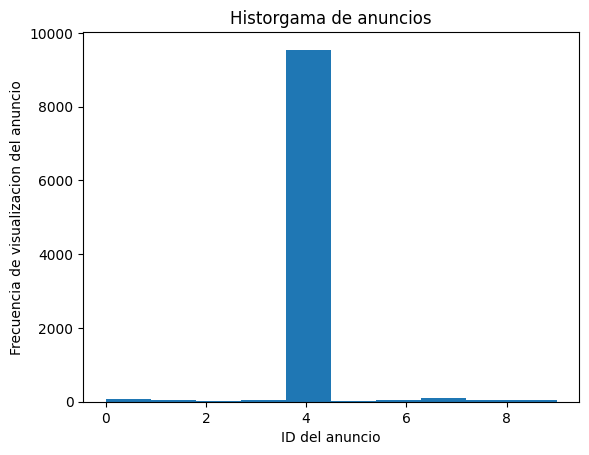

In [4]:
plt.hist(ads_selected)
plt.title("Historgama de anuncios")
plt.xlabel("ID del anuncio")
plt.ylabel("Frecuencia de visualizacion del anuncio")
plt.show()